# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

If I had to cut one of the two plots, I would cut the “number of estimators (trees)” plot because it provides less insight after the initial few trees—random forest performance usually stabilizes quickly as the number of trees increases. The “amount of training data used” plot is more interesting and important because it shows how additional data continues to improve model performance, which is a more actionable and fundamental takeaway for understanding model behavior. Therefore, "amount of training data used" should be on the x-axis because it provides a clearer illustration of the relationship between data size and prediction quality, whereas the number of estimators only refines the model slightly after a point.

In [9]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

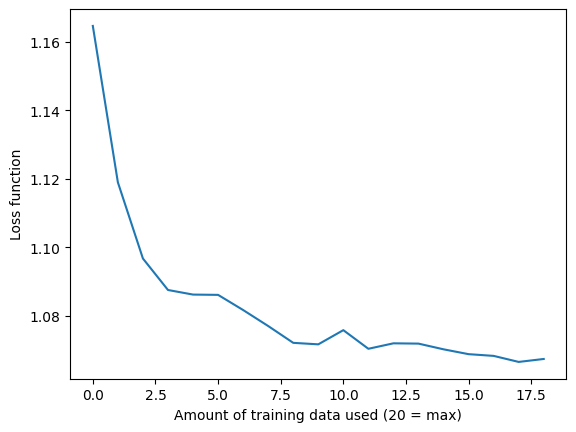

In [11]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [12]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

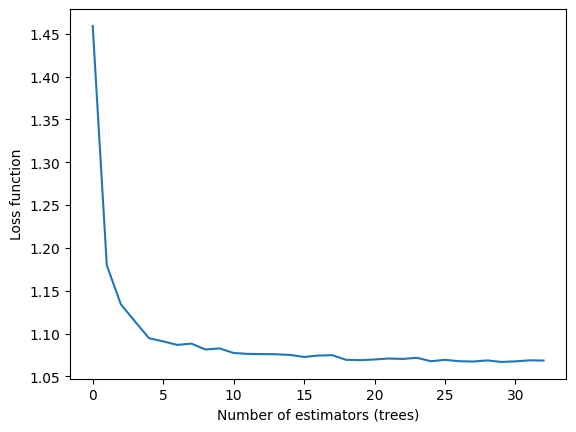

In [13]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv("your_dataset.csv")

X = df.drop(columns=["Target"])  # Replace "Target" with your actual target column
y = df["Target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Base Model RMSE: {rmse:.4f}")

cv_scores = cross_val_score(rf, X, y, cv=5, scoring="neg_root_mean_squared_error")
print(f"Cross-Validation RMSE: {(-cv_scores).mean():.4f}")


param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
print("Best Parameters:", rf_random.best_params_)

y_pred_tuned = rf_random.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Tuned Model RMSE: {rmse_tuned:.4f}")


rmse_lst = []
num_points = len(X_train)
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(X_train[:x], y_train[:x])
    rmse_lst.append(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("RMSE")
plt.title("RMSE vs Training Data Size")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

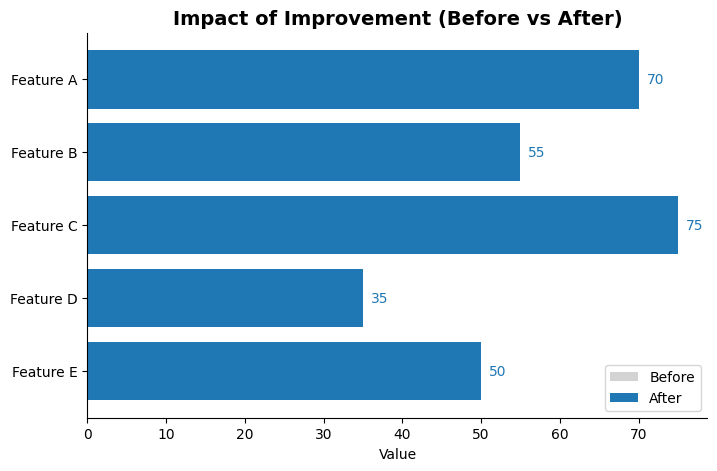

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset (Before and After comparison)
data = {
    "Category": ["Feature A", "Feature B", "Feature C", "Feature D", "Feature E"],
    "Before": [45, 30, 60, 25, 40],
    "After": [70, 55, 75, 35, 50]
}

df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot Before values (gray for context)
ax.barh(df["Category"], df["Before"], color="lightgray", label="Before")

# Plot After values (highlighted)
ax.barh(df["Category"], df["After"], color="#1f77b4", label="After")

# Add labels to the highlighted bars
for i, v in enumerate(df["After"]):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color="#1f77b4")

# Title and labels
ax.set_title("Impact of Improvement (Before vs After)", fontsize=14, weight='bold')
ax.set_xlabel("Value")
ax.legend()

# Clean style
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gca().invert_yaxis()  # Match typical storytelling with data style
plt.show()
